In [24]:
import localgraphclustering as lgc

import time
import numpy as np

# Import matplotlib 
import matplotlib.pyplot as plt

# Load graph

In [25]:
# Read graph. This also supports gml format.
g = lgc.GraphLocal('datasets/JohnsHopkins.graphml','graphml')

# To get a quick look at the list of methods and attributes for the graph object 'g' you can type 'g.' + tab
# and scroll up or down.

/home/dgleich/.local/lib/python3.5/site-packages/localgraphclustering/GraphLocal.py:196: UserWarning:

Loading a graphml is not efficient, we suggest using an edgelist format for this API.



# Nodes embedding via fiedler vector

In [26]:
# Call the global spectral partitioning algorithm.
output_sp = lgc.fiedler(g)
print(output_sp)

[-0.00803248 -0.0022975   0.02512438 ...  0.00640856 -0.00432509
 -0.00493   ]


# Nodes embedding via PageRank vector

In [27]:
ref_node = [3215]
# L1-regularized PageRank solver.
output_acl = lgc.approximate_PageRank(g,ref_node)
print(output_acl)
output_acl = lgc.approximate_PageRank(g,ref_node,cpp = False)
print(output_acl)
output_l1reg = lgc.approximate_PageRank(g,ref_node,method = "l1reg")
print(output_l1reg)
output_l1reg = lgc.approximate_PageRank(g,ref_node,method = "l1reg",cpp = False)
print(output_l1reg)
output_weighted = lgc.approximate_PageRank_weighted(g,ref_node)
print(output_weighted) 

[0.         0.         0.00017015 ... 0.00013902 0.         0.        ]
[0.         0.         0.00017015 ... 0.00013902 0.         0.        ]
[0.         0.         0.00015612 ... 0.00012953 0.         0.        ]
[0.         0.         0.00015612 ... 0.00012953 0.         0.        ]
[0.         0.         0.00017015 ... 0.00013902 0.         0.        ]


# Rounding algorithms

In [28]:
output_sc = lgc.sweep_cut(g,output_acl,normalized=False)
print(output_sc)
output_sc = lgc.sweep_cut(g,output_l1reg,cpp=False)
print(output_sc)
output_sc = lgc.sweep_cut(g,output_l1reg)
print(output_sc)
output_sc = lgc.sweep_cut(g,output_l1reg,normalized=False)
print(output_sc)

[array([3215, 4870, 4556,  864, 2242, 1522,  303, 1979, 4483, 3225, 4872,
       3932, 5113, 1508, 4022, 4827, 3253, 2876, 4072, 2462,  377, 1471,
        113, 4458,  196, 1742, 4993,  465, 4479, 2265, 1778, 1389,  985,
        315, 2769, 2979, 3831, 4762, 4921, 2119, 1142, 4878, 4410, 4471,
       3372, 3182, 4683, 1266, 1668,  297, 3712, 3836, 1989, 4796, 3870,
       1448, 4684, 4726, 5078, 1768,  565,  331, 2581, 1730,   62, 2250,
       2629, 2582, 1236, 3467, 2537, 1267, 2032, 5018,  295, 3834, 3488,
       4813, 2176, 3057,   26, 1672, 3807,  553, 1074, 1475, 1862, 4348,
       4294, 4087, 5095, 3910, 1743, 1065,   47, 1393, 2470, 4930, 1213,
       4259, 3151, 2561,  102,  997, 3429, 2437,  200, 3634,  811, 4906,
       3919, 3008,  269, 2776,  213, 2863, 1950, 3811, 4771,  529, 2138,
       3840, 5098, 1506, 4118, 4155, 1135, 1748,  495, 1309, 3921,  246,
       4454, 2421, 3827, 3149,  346, 4871, 4263, 1424, 4951, 2101,  348,
       3221, 1350, 3776,  316, 1703, 1595,  976, 3

# Spectral local graph partitioning methods

In [29]:
ref_node = [3215]

# Find a cluster using approximate PageRank.
output_pr_clustering = lgc.spectral_clustering(g,ref_node,method="acl",iterations=100000)
print(output_pr_clustering)
output_pr_clustering = lgc.spectral_clustering(g,ref_node,method="acl_weighted",iterations=100000)
print(output_pr_clustering)
output_pr_clustering = lgc.spectral_clustering(g,ref_node,method="l1reg")
print(output_pr_clustering)

[array([3215, 4870, 4872,  303,  377, 2876, 4827, 3932, 3912, 2242, 4072,
       5113, 1979, 4022, 1522, 1672, 2462, 3225, 1508, 3253, 3920, 4300,
       2377, 2809, 1205, 4155, 4483,  540,  532, 2010, 4041, 3404, 1961,
       2109,  297, 3284, 4556, 4878, 1065,  703, 4312,  316,  864,  917,
       3974, 1929, 3593, 3572,  572, 1506,  749, 4921, 1278, 2582, 4447,
       4725, 2670, 3287,  733, 3955, 5133, 5018, 1983, 3290, 5098, 2590,
       1384, 1989, 1236, 1207, 4018, 5102, 4732,  352, 3488,  811,  313,
        102, 3910, 3535, 1997, 1309, 3151, 2437, 3936, 3536, 4871, 1389,
       5078,  495,  680, 3149, 2739, 1419, 2537, 3164,  199, 2735,  588,
       4621, 5071, 3990, 2863, 3654, 3467, 1748, 1267, 4951,   47, 2250,
       2695, 2868, 1731,  331,  139,  246, 4813, 4089, 2519,   22, 4477,
       2743, 1301, 4930, 1953, 1433, 1720, 5124, 2257, 4458, 4044, 4484,
       3866, 4993, 2579, 2799, 4254, 3950, 3807, 1471, 2032, 4683, 1597,
       3840, 3372, 3921, 4743, 4950, 1909, 1359, 4

# Flow-based local graph partitioning methods

In [30]:
ref_node = [3215]
output_crd = lgc.flow_clustering(g,ref_node,method="crd")
print(output_crd)

[array([5043, 4153, 4341,  460,  533, 4814, 3430, 5125, 1467, 3406, 3471,
        654,  162,  528, 4265, 1482, 3409, 2572, 1217, 2761, 1615, 4347,
       2697, 2380, 1746, 2240, 2310, 4418, 4119, 1445, 3240,  548,  858,
       4933, 2099, 2666, 2360, 4749, 3167, 2509, 1599, 2237, 2399, 4863,
        371, 3357, 3539, 1834, 1457, 2684, 2077, 4545, 4780, 3457, 4893,
       3031, 3585, 2935, 5149, 2048, 3224, 3094, 2416, 4215, 3695, 1413,
       1928, 1491, 1707, 4111, 3044, 3614, 4037, 1949, 1683,  114, 1861,
       1700,  869,  539, 4278, 1760, 4612, 2817, 3664, 2918, 2189, 2110,
       3648, 5010, 3428, 4619, 2829, 4349, 4175, 4159, 4053, 4033,  363,
       3676, 3627, 1883, 3598, 5116, 3375, 4568, 2725, 2673, 2255, 1823,
       1437, 1353, 5092, 3994,  711, 4492,  788, 2376, 1900, 2134,  190,
       2281, 4162, 1365,  291, 4695, 1763, 4370, 3892, 3259, 2180, 1946,
       2270, 2141, 3401, 1305, 3145, 4880, 3139, 1331, 4790, 3284, 4392,
       4622, 4894, 4328, 4071, 2138, 2126,  931, 1

In [31]:
G = lgc.GraphLocal('datasets/minnesota.edgelist','edgelist',remove_whitespace=True)
ref_node = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,73,74,75,76,77,78,79,80,81,82,83,84,85,87,88,89,90,91,92,93,94,95,97,98,99,100,102,103,104,105,106,108,112,114,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,139,140,141,142,143,144,145,147,148,149,150,151,152,155,157,158,159,160,161,162,164,165,166,168,169,171,172,173,176,177,178,179,180,185,187,188,191,192,195,196,197,201,208,209,210,211,212,215,217,218,219,221,223,225,226,227,228,231,232,244,245,246,247,248,249,253,254,257,261,262,265,269,270,271,272,273,275,276,277,278,279,285,286,287,290,291,299,303,323,327]
output_mqi = lgc.flow_clustering(G,ref_node,method="mqi")
print(output_mqi)
output_sl = lgc.flow_clustering(G,ref_node,method="sl")
print(output_sl)

[array([ 95,  94,  93,  92,  91,  90,  89,  88,  85,  84,  83,  82,  81,
        80,  79,  78,  77,  76,  75,  74,  73,  71,  70,  69,  68,  67,
        65,  64,  63,  62,  61,  60,  59,  57,  56,  55, 254,  54, 253,
        53,  52,  51,  50, 249,  49, 248,  48, 247,  47, 246,  46, 245,
        21,  20, 219,  19,  18, 217,  17,  16, 215,  15,  14,  13, 212,
        12, 211,  11, 210,  10, 209,   3,   2,  98,   1,   0,   4,   5,
         6,   7,   8,   9, 208,  22,  23,  24, 223,  25,  26, 225,  27,
       226,  28, 227,  29, 228,  30,  31,  32, 231,  33, 232,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45, 244,  99, 100,
       102, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 139, 141, 142, 143, 144, 145, 149, 151, 152, 158, 164,
       169, 171, 176, 177, 178, 180, 187, 188, 191, 192, 195],
      dtype=uint32), 0.03664921465968586]


/home/dgleich/.local/lib/python3.5/site-packages/localgraphclustering/flow_clustering.py:46: UserWarning:

The weights of the graph will be discarded. Use "crd" if you want to keep them.

/home/dgleich/.local/lib/python3.5/site-packages/localgraphclustering/flow_clustering.py:52: UserWarning:

The weights of the graph will be discarded. Use "crd" if you want to keep them.



[array([111, 194, 170, 116, 110, 113, 184, 167,   3,   0,   7,   5,   4,
         9,   2,   8,  13,   6,  14,   1,  17,  12,  18,  11,  20,  23,
        16,  33,  15,  21,  32,  31,  34,  10,  22,  45,  40,  19,  41,
        53,  42,  43,  54,  46,  59,  55,  60,  63,  61,  62,  56,  52,
        39,  71,  70,  73,  75,  74,  65,  77,  69,  79,  57,  78,  76,
        82,  80,  67,  88,  68,  91,  84,  81,  83,  90,  95,  93,  92,
       102, 105, 107, 103, 106, 109, 112, 104, 100,  51, 128,  94, 127,
       130, 131,  98, 139, 123, 141,  99, 114,  89, 144, 142, 155, 160,
       157, 151, 162, 174, 161, 166, 159, 164, 152, 172, 165, 175, 149,
       176, 173, 168, 178, 177, 179, 158, 126, 171, 169, 187, 185, 180,
       191, 209, 211, 208, 192, 210, 132, 215, 201, 221, 188, 217, 195,
       227, 226, 225, 228, 219, 232, 231, 244, 246, 245, 247, 248, 253,
       249, 254, 223, 274, 276, 275, 212, 279, 293, 290, 299, 273],
      dtype=uint32), 0.021479713603818614]


# Example for multiclass label prediction

In [32]:
g = lgc.GraphLocal('datasets/JohnsHopkins.graphml','graphml')

# List of nodes around which we want to find labels
labels = [[1,10,300],[3215],[1002,2500,540]]

output_mc=lgc.multiclass_label_prediction(g,labels=labels)

/home/dgleich/.local/lib/python3.5/site-packages/localgraphclustering/GraphLocal.py:196: UserWarning:

Loading a graphml is not efficient, we suggest using an edgelist format for this API.



In [33]:
print(output_mc)

[[array([1.04086068e-04, 8.82070078e-02, 0.00000000e+00, ...,
       7.12325775e-05, 1.83865923e-05, 3.58764416e-05]), array([0.        , 0.        , 0.00015612, ..., 0.00012953, 0.        ,
       0.        ]), array([1.35484783e-05, 8.48034046e-06, 0.00000000e+00, ...,
       3.29514805e-05, 2.52403859e-05, 2.13057075e-07])], [array([ 627,    0, 3605, ...,  885, 2064, 1511]), array([2124, 3753,  413, ...,  465, 4133, 5156]), array([2152, 2526, 4146, ..., 1328, 1579, 3600])], [0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 0, 1, 2, 2, 1, 1, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 2, 0, 2, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 2, 1

# Densest subgraph 

In [34]:
#How to use densest subgraph method.
g = lgc.GraphLocal('datasets/Erdos02-cc.edgelist','edgelist',' ')
lgc.densest_subgraph(g)

[4.971153846153846,
 array([   3,    4,    5,    7,   27,   30,   33,   37,   45,   54,   57,
          68,   70,   81,  105,  113,  121,  150,  154,  156,  162,  163,
         171,  174,  175,  176,  178,  181,  185,  193,  201,  208,  225,
         244,  248,  252,  255,  256,  259,  262,  265,  266,  269,  272,
         273,  280,  282,  285,  287,  294,  302,  305,  309,  314,  322,
         333,  335,  337,  347,  358,  373,  378,  379,  396,  397,  398,
         405,  406,  411,  416,  425,  433,  435,  449,  452,  454,  457,
         465,  470,  474,  490,  493,  778, 1340, 1489, 2039, 2452, 2797,
        2845, 3392, 3692, 3754, 3760, 4067, 4416, 4795, 4875, 5012, 5060,
        5079, 5170, 5464, 5519, 5533], dtype=uint32)]

# Network Community Profile

In [35]:
G = lgc.GraphLocal("datasets/neuro-fmri-01.edges",file_type = "edgelist", separator = " ", header = True)
ncp_instance = lgc.NCPData(G)
ncp_instance.approxPageRank(ratio=0.1,nthreads=4)

There are  738  connected components in the graph


/home/dgleich/.local/lib/python3.5/site-packages/localgraphclustering/GraphLocal.py:435: UserWarning:

The graph has multiple (738) components, using the largest with 5725 / 6476 nodes

/home/dgleich/.local/lib/python3.5/site-packages/localgraphclustering/spectral_clustering.py:92: UserWarning:

The weights of the graph will be discarded. Use approximate_PageRank_weighted instead if you want to keep the edge weights.

/home/dgleich/.local/lib/python3.5/site-packages/localgraphclustering/approximate_PageRank.py:105: UserWarning:

The weights of the graph will be discarded. Use approximate_PageRank_weighted instead if you want to keep the edge weights.



In [36]:
ncp_instance.crd(ratio=0.01,w=10,U=10,h=1000,nthreads=4)

In [37]:
ncp_instance.mqi(ratio=0.1,nthreads=4)

/home/dgleich/.local/lib/python3.5/site-packages/localgraphclustering/flow_clustering.py:46: UserWarning:

The weights of the graph will be discarded. Use "crd" if you want to keep them.



In [38]:
ncp_instance.l1reg(ratio=0.1,nthreads=4)

/home/dgleich/.local/lib/python3.5/site-packages/localgraphclustering/spectral_clustering.py:92: UserWarning:

The weights of the graph will be discarded. Use approximate_PageRank_weighted instead if you want to keep the edge weights.

/home/dgleich/.local/lib/python3.5/site-packages/localgraphclustering/approximate_PageRank.py:105: UserWarning:

The weights of the graph will be discarded. Use approximate_PageRank_weighted instead if you want to keep the edge weights.



## Plot NCP with CRD

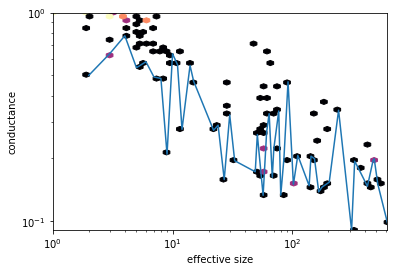

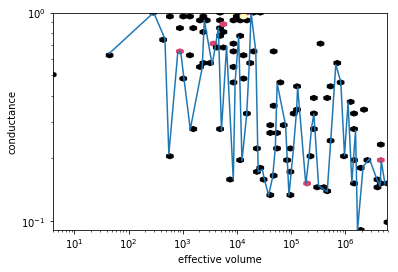

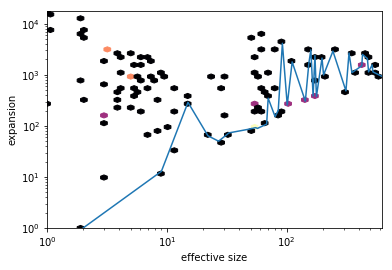

In [39]:
ncp_plots = lgc.NCPPlots(ncp_instance,method_name = "crd")
#plot conductance vs size
fig, ax, _ = ncp_plots.cond_by_size()
plt.show()
#plot conductance vs volume
fig, ax, _ = ncp_plots.cond_by_vol()
plt.show()
#plot isoperimetry vs size
fig, ax, _ = ncp_plots.isop_by_size()
plt.show()

## Plot NCP with MQI

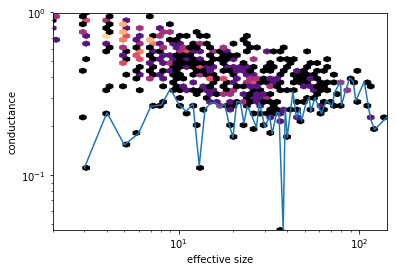

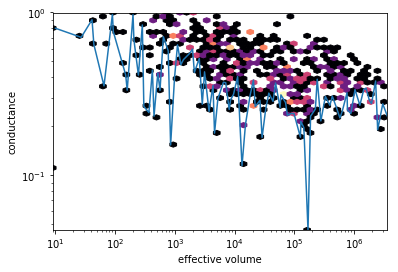

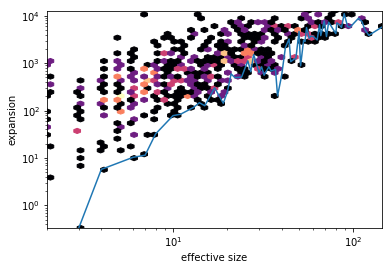

In [40]:
ncp_plots = lgc.NCPPlots(ncp_instance,method_name = "mqi")
#plot conductance vs size
fig, ax, _ = ncp_plots.cond_by_size()
plt.show()
#plot conductance vs volume
fig, ax, _ = ncp_plots.cond_by_vol()
plt.show()
#plot isoperimetry vs size
fig, ax, _ = ncp_plots.isop_by_size()
plt.show()

## Plot NCP with l1reg

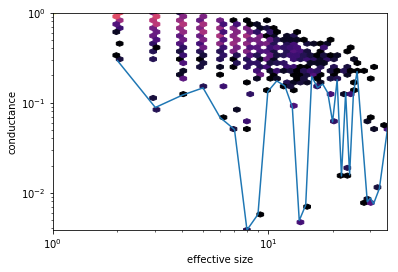

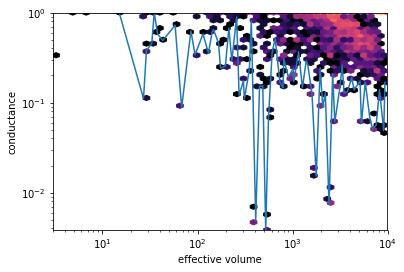

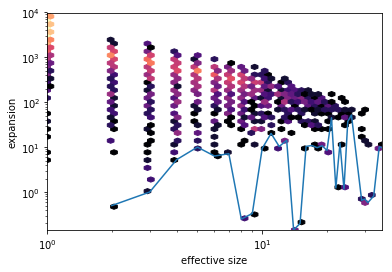

In [41]:
ncp_plots = lgc.NCPPlots(ncp_instance,method_name = "l1reg")
#plot conductance vs size
fig, ax, _ = ncp_plots.cond_by_size()
plt.show()
#plot conductance vs volume
fig, ax, _ = ncp_plots.cond_by_vol()
plt.show()
#plot isoperimetry vs size
fig, ax, _ = ncp_plots.isop_by_size()
plt.show()

## Plot NCP with acl

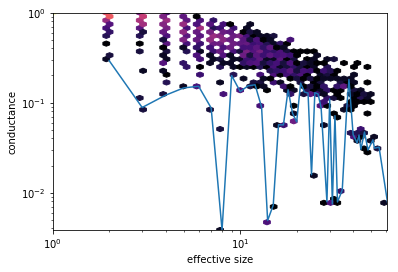

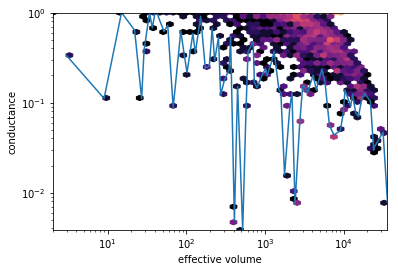

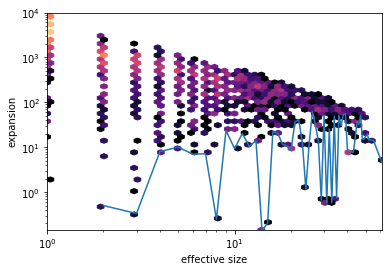

In [42]:
ncp_plots = lgc.NCPPlots(ncp_instance,method_name = "acl")
#plot conductance vs size
fig, ax, _ = ncp_plots.cond_by_size()
plt.show()
#plot conductance vs volume
fig, ax, _ = ncp_plots.cond_by_vol()
plt.show()
#plot isoperimetry vs size
fig, ax, _ = ncp_plots.isop_by_size()
plt.show()

## Plot NCP with selected rows

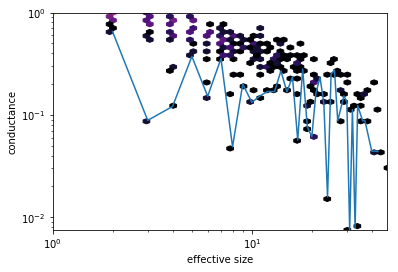

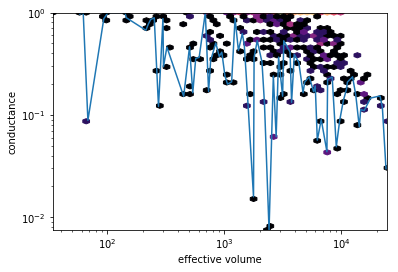

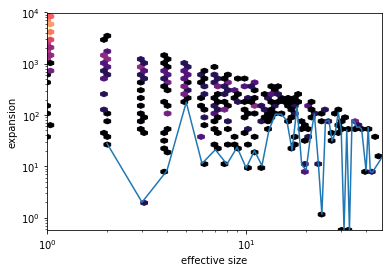

In [43]:
ncp_plots = lgc.NCPPlots(ncp_instance,selected_rows = range(500))
#plot conductance vs size
fig, ax, _ = ncp_plots.cond_by_size()
plt.show()
#plot conductance vs volume
fig, ax, _ = ncp_plots.cond_by_vol()
plt.show()
#plot isoperimetry vs size
fig, ax, _ = ncp_plots.isop_by_size()
plt.show()

## Extract a specific NCP result

In [44]:
#Get the first ncp result
print(ncp_instance.output_set(0))

[2858]


/home/dgleich/.local/lib/python3.5/site-packages/localgraphclustering/spectral_clustering.py:92: UserWarning:

The weights of the graph will be discarded. Use approximate_PageRank_weighted instead if you want to keep the edge weights.

/home/dgleich/.local/lib/python3.5/site-packages/localgraphclustering/approximate_PageRank.py:105: UserWarning:

The weights of the graph will be discarded. Use approximate_PageRank_weighted instead if you want to keep the edge weights.



## Clustering metrics for vertex neighborhood

In [45]:
g = lgc.GraphLocal('datasets/dolphins.smat',separator = ' ')
help(lgc.triangleclusters)
cond,cut,vol,cc,t = lgc.triangleclusters(g)

Help on function triangleclusters in module localgraphclustering.triangleclusters:

triangleclusters(G)
    TRIANGLECLUSTERS Clustering metrics for clusters of vertex neighborhoods.
    This function studies clusters which are given by vertex neighborhoods.
    Let v be a vertex in a graph, then the cluster associated with v is just
    the set of all neighbors of v and v itself.  We return the clustering
    metrics associated with these clusters for all vertices in the graph.
    
    Parameters
    ----------
    
    G: GraphLocal
    
    Returns
    -------
    
    cond: Sequence[float]
        conductance of each cluster of a vertex neighborhood
    
    cut: Sequence[float]
        cut of each cluster
    
    vol: Sequence[float]
        volume of each cluster
    
    cc: Sequence[float]
        clustering coefficient of each vertex
    
    t: Sequence[float]
        number of triangles centered at each vertex



## Find extrema in a graph based on neighborhoods.

In [46]:
help(lgc.neighborhoodmin)
minverts, minvals = lgc.neighborhoodmin(g,cond,True)

Help on function neighborhoodmin in module localgraphclustering.neighborhoodmin:

neighborhoodmin(G, vals, strict)
    Find extrema in a graph based on neighborhoods.
    Parameters
    ----------
    G: GraphLocal
    vals: Sequence[float]
        features of neighborhoods used to compare against each other, i.e. conductance
    strict: bool
        If True, find a set of vertices where vals(i) < vals(j) for all neighbors N(j)
        i.e. local minima in the space of the graph
        If False, find a set of vertices where vals(i) <= vals(j) for all neighbors N(j)
        i.e. local minima in the space of the graph
    Returns
    -------
    minverts: Sequence[int]
        the set of vertices
    minvals: Sequence[float]
        the set of min values

